# Import Libraries

In [2]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Objective Functions To Be Optimized

In [3]:
def objective1(x):
    y = -x**3
    return y

In [4]:
def objective2(x):
    y = -(x-2)**2
    return y

# Parameter Initialization

In [5]:
population = 25
max_gen = 501
min_value= -100
max_value= 100

# Helper Methods

In [6]:
def index_locator(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

In [7]:
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_locator(min(values),values) in list1:
            sorted_list.append(index_locator(min(values),values))
        values[index_locator(min(values),values)] = math.inf
    return sorted_list

In [8]:
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 9999999999999999
    distance[len(front) - 1] = 9999999999999999
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

# Genetic Operator Functions

In [9]:
def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation((a-b)/2)

In [10]:
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob <1:
        solution = min_value+(max_value-min_value)*random.random()
    return solution

# Algorithm

In [11]:
def non_dominated_sorting_algorithm(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)
    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)
    del front[len(front)-1]
    return front

# Final Implementation Function

In [12]:
def nsga2(population,max_gen,min_value,max_value):
    
    gen_no=0
    solution=[min_value+(max_value-min_value)*random.random() for i in range(0,population)]
    
    while(gen_no<max_gen):
        objective1_values = [objective1(solution[i])for i in range(0,population)]
        objective2_values = [objective2(solution[i])for i in range(0,population)]
        non_dominated_sorted_solution = non_dominated_sorting_algorithm(objective1_values[:],objective2_values[:])
        print('Best Front for Generation:',gen_no)
        for values in non_dominated_sorted_solution[0]:
            print(round(solution[values],3),end=" ")
        print("\n")
        crowding_distance_values=[]
        for i in range(0,len(non_dominated_sorted_solution)):
            crowding_distance_values.append(crowding_distance(objective1_values[:],objective2_values[:],non_dominated_sorted_solution[i][:]))
        solution2 = solution[:]
        
        while(len(solution2)!=2*population):
            a1 = random.randint(0,population-1)
            b1 = random.randint(0,population-1)
            solution2.append(crossover(solution[a1],solution[b1]))
        objective1_values2 = [objective1(solution2[i])for i in range(0,2*population)]
        objective2_values2 = [objective2(solution2[i])for i in range(0,2*population)]
        non_dominated_sorted_solution2 = non_dominated_sorting_algorithm(objective1_values2[:],objective2_values2[:])
        crowding_distance_values2=[]
        for i in range(0,len(non_dominated_sorted_solution2)):
            crowding_distance_values2.append(crowding_distance(objective1_values2[:],objective2_values2[:],non_dominated_sorted_solution2[i][:]))
        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_locator(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==population):
                    break
            if (len(new_solution) == population):
                break
        solution = [solution2[i] for i in new_solution]
        gen_no = gen_no + 1
    return [objective1_values, objective2_values]

# Curve Plotter

In [13]:
def non_dominating_curve_plotter(objective1_values, objective2_values):
    plt.figure(figsize=(15,8))
    objective1 = [i * -1 for i in objective1_values]
    objective2 = [j * -1 for j in objective2_values]
    plt.xlabel('Objective Function 1', fontsize=15)
    plt.ylabel('Objective Function 2', fontsize=15)
    plt.scatter(objective1, objective2, c='red', s=25)

# Operation

In [14]:
objective1_values, objective2_values = nsga2(population,max_gen,min_value,max_value)

Best Front for Generation: 0
-92.224 -3.272 -30.435 -83.455 -7.998 -63.615 -56.575 -32.318 -3.674 -20.519 -77.613 -38.804 -21.231 -39.299 -65.071 

Best Front for Generation: 1
-73.664 -92.224 -3.272 -30.435 -83.455 -7.998 -63.615 -56.575 -32.318 -3.674 -20.519 -77.613 -38.804 -21.231 -39.299 -65.071 -75.831 -8.388 -74.261 -71.275 -78.37 -59.612 -83.061 -47.087 -74.754 

Best Front for Generation: 2
-36.068 -73.664 -92.224 -3.272 -30.435 -83.455 -7.998 -63.615 -56.575 -32.318 -3.674 -20.519 -77.613 -38.804 -21.231 -39.299 -65.071 -75.831 -8.388 -74.261 -71.275 -78.37 -59.612 -83.061 -47.087 

Best Front for Generation: 3
-30.912 -36.068 -73.664 -92.224 -3.272 -30.435 -83.455 -7.998 -63.615 -56.575 -32.318 -3.674 -20.519 -77.613 -38.804 -21.231 -39.299 -65.071 -75.831 -8.388 -74.261 -71.275 -78.37 -59.612 -83.061 

Best Front for Generation: 4
-76.376 -30.912 -36.068 -73.664 -92.224 -3.272 -30.435 -83.455 -7.998 -63.615 -56.575 -32.318 -3.674 -20.519 -77.613 -38.804 -21.231 -39.299 -65.

# Non Dominating Curve

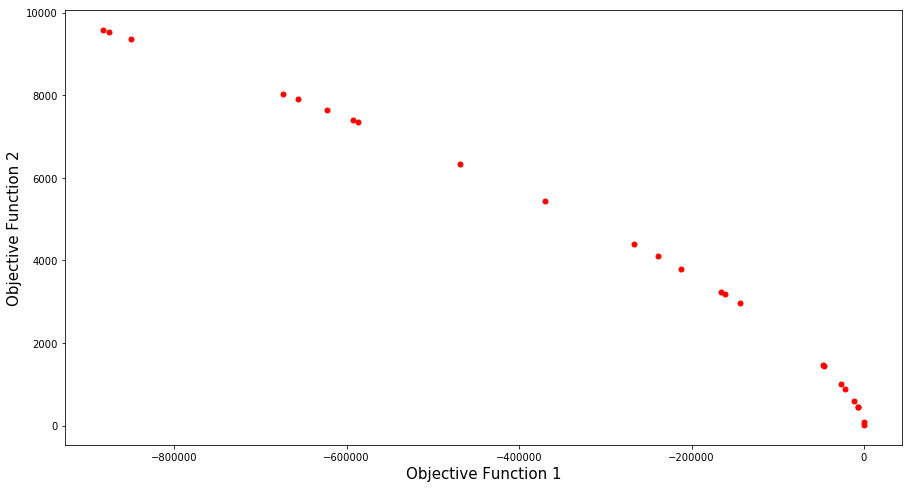

In [14]:
non_dominating_curve_plotter(objective1_values, objective2_values)